In [0]:
#!wget --no-check-certificate \
 #   https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
  #  -O /content/drive/My\ Drive/Colab\ Notebooks/horse\ and\ human/validation-horse-or-human.zip

## Unzipping the file

In [0]:
import os 
import zipfile

local_zip = "/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human")
local_zip = "/content/drive/My Drive/Colab Notebooks/horse and human/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/content/drive/My Drive/Colab Notebooks/horse and human/validation-horse-or-human")
zip_ref.close()

As we do not specify the label to the images explicitly  Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step.

Let's define each of these directories:

In [0]:
# directory with training horse
train_horse_dir = os.path.join("/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses")
# training directory for the human
train_human_dir = os.path.join("/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/humans")
# Directory with validaiton horse
val_horse_dir = os.path.join("/content/drive/My Drive/Colab Notebooks/horse and human/validation-horse-or-human/horses")
# dir with val human
val_human_dir = os.path.join("/content/drive/My Drive/Colab Notebooks/horse and human/validation-horse-or-human/humans")

## Looking into the directory 

In [0]:
train_horse_name = os.listdir(train_horse_dir)
train_human_name = os.listdir(train_human_dir)
val_horse_name = os.listdir(val_horse_dir)
val_human_name = os.listdir(val_human_dir)

In [38]:
train_horse_name[0]

'horse05-9.png'

## Plotting the images for better visualization

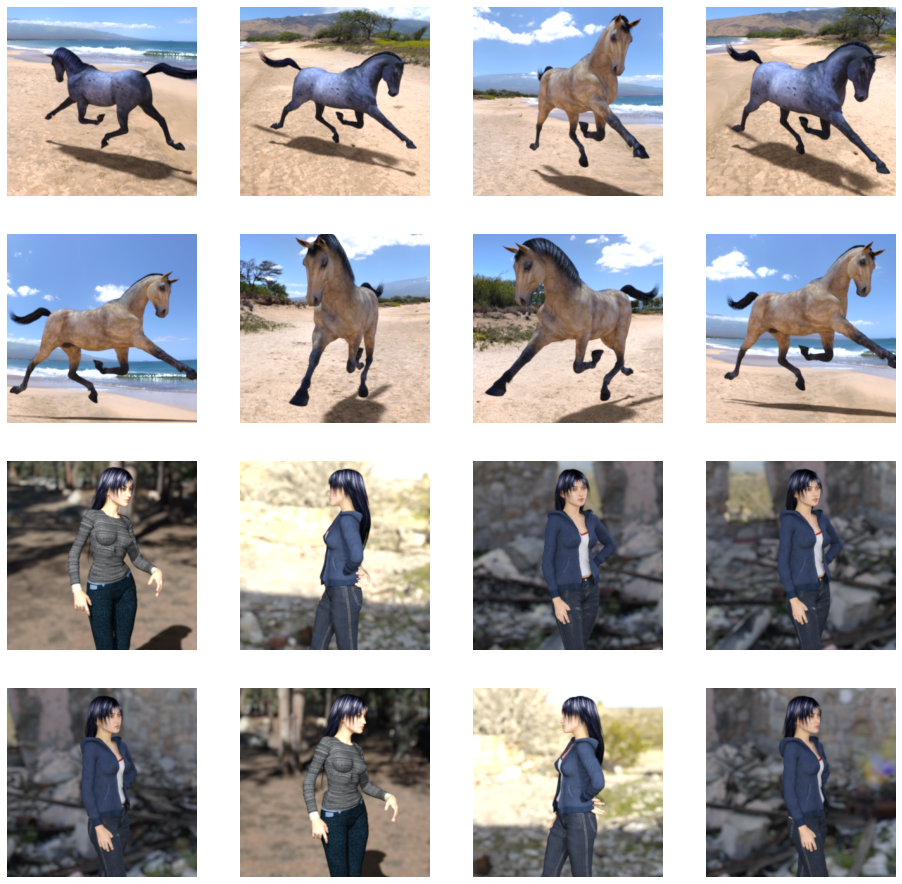

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpmimg

##paramter for our graph
nrows = 4
ncols = 4

#plotting the figure
fig, ax = plt.subplots(figsize = (nrows*4, ncols*4))
pic_index = 8
horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_name[pic_index-8:pic_index]]
human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_name[pic_index-8:pic_index]]

for i , img_path in enumerate(horse_pic+human_pic):
  #setup subplot, subplotts start with indices1
  sp = plt.subplot(nrows, ncols , i+1)
  sp.axis("off")
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()  

In [40]:
horse_pic

['/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse05-9.png',
 '/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse05-0.png',
 '/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse06-3.png',
 '/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse05-1.png',
 '/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse06-0.png',
 '/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse06-4.png',
 '/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse06-5.png',
 '/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human/horses/horse06-1.png']

## Building the model from scratch

The "output shape" column shows how the size of your feature  evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

## Flatten the reults to fed into deep neural network
        # This Flatten Layer convert the image into a single tensor 
        # for ex last convlution layer gave output of 35*35 of 3 bytes
        # it convert into the 35*35*3 of single tensors

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),


        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the Machine Learning Crash Course.) We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = "binary_crossentropy",
              optimizer = RMSprop(lr = 0.01),
              metrics = ["accuracy"])

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

Now Lets create a Data Generator which read our pictures from source folders and convert them into float32 Tensors And fed them to our neural networks


As data Goes into the model must be normalized means its value must be between 0-1.

And our image are in the format of range of 0-255 we normalize our images

In keras we do this be using ImageDataGenerator   and rescale them using the rescale parameter

This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [66]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## all the images is rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen  = ImageDataGenerator(rescale = 1/255)

# flow images in batches of 128 using the train_data_gen generator
train_generator = train_datagen.flow_from_directory(
   "/content/drive/My Drive/Colab Notebooks/horse and human/horse-or-human",
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'binary'

)

val_generator = validation_datagen.flow_from_directory(
    "/content/drive/My Drive/Colab Notebooks/horse and human/validation-horse-or-human",
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'

)



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


lets train for 15 epochs - this may take few minutes
The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses

In [67]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = val_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 7s 828ms/step - loss: 86.8178 - accuracy: 0.4839 - val_loss: 0.9988 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 825ms/step - loss: 0.7424 - accuracy: 0.4905 - val_loss: 0.6879 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 7s 822ms/step - loss: 0.6933 - accuracy: 0.5562 - val_loss: 0.6782 - val_accuracy: 0.6602
Epoch 4/15
8/8 [==============================] - 7s 819ms/step - loss: 0.6823 - accuracy: 0.5762 - val_loss: 0.6239 - val_accuracy: 0.5898
Epoch 5/15
8/8 [==============================] - 7s 819ms/step - loss: 0.7020 - accuracy: 0.5595 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 7s 829ms/step - loss: 0.6785 - accuracy: 0.5862 - val_loss: 0.6232 - val_accuracy: 0.5898
Epoch 7/15
8/8 [==============================] - 6s 812ms/step - loss: 0.6208 - accuracy: 0.6051 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 8/15
8/8 [===

## Running / Predicting the model

In [2]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = "/content/"+fn
  img = image.load_img(path , target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn+'is a horse')

  else:
    print(fn+"is a human")  

# VGG16
## Using pretrained model to predicting the image


In [8]:
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16

## Load the keras vgg16 model
model = vgg16.VGG16()

#Uploading the image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = "/content/"+fn
  # uploading the image and resizing the image
  img = image.load_img(path , target_size = (224, 224))
  # convert the image into the numpy array
  x = image.img_to_array(img)
  # Adding the 4th dimension as keras expect the list of images
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  ## Normalize the input pixel value to the range used when training the network
images = vgg16.preprocess_input(images)

  # Run the image through the deep neural network to make the prediction
predictions = model.predict(images)

  ## Look the names of the predicted classes index zero is the result for the first prediction
predicted_classes = vgg16.decode_predictions(predictions, top = 9)

for imagenet_id, name, liklihood in predicted_classes[0]:
  print("prediction : {} - {:2f}".format(name, liklihood))

Saving brown-horse-beside-gray-metal-bar-53114.jpg to brown-horse-beside-gray-metal-bar-53114 (1).jpg
prediction : sorrel - 0.236883
prediction : llama - 0.210095
prediction : Arabian_camel - 0.104415
prediction : ram - 0.063221
prediction : ox - 0.061383
prediction : basenji - 0.042102
prediction : hog - 0.036395
prediction : worm_fence - 0.024138
prediction : bighorn - 0.021488


In [79]:
x

array([[[[246., 244., 245.],
         [246., 245., 241.],
         [247., 245., 248.],
         ...,
         [245., 241., 238.],
         [245., 235., 233.],
         [239., 224., 217.]],

        [[244., 243., 241.],
         [245., 244., 242.],
         [247., 245., 246.],
         ...,
         [246., 238., 235.],
         [243., 232., 228.],
         [236., 219., 211.]],

        [[245., 244., 242.],
         [247., 245., 246.],
         [248., 246., 247.],
         ...,
         [246., 236., 234.],
         [242., 231., 225.],
         [239., 222., 215.]],

        ...,

        [[ 70.,  43.,  36.],
         [ 92.,  55.,  47.],
         [ 94.,  60.,  48.],
         ...,
         [255., 219., 193.],
         [255., 220., 196.],
         [255., 218., 191.]],

        [[ 86.,  53.,  46.],
         [ 91.,  57.,  48.],
         [ 75.,  44.,  39.],
         ...,
         [255., 218., 191.],
         [255., 218., 191.],
         [254., 215., 186.]],

        [[ 67.,  39.,  35.],
       

In [80]:
images

array([[[[246., 244., 245.],
         [246., 245., 241.],
         [247., 245., 248.],
         ...,
         [245., 241., 238.],
         [245., 235., 233.],
         [239., 224., 217.]],

        [[244., 243., 241.],
         [245., 244., 242.],
         [247., 245., 246.],
         ...,
         [246., 238., 235.],
         [243., 232., 228.],
         [236., 219., 211.]],

        [[245., 244., 242.],
         [247., 245., 246.],
         [248., 246., 247.],
         ...,
         [246., 236., 234.],
         [242., 231., 225.],
         [239., 222., 215.]],

        ...,

        [[ 70.,  43.,  36.],
         [ 92.,  55.,  47.],
         [ 94.,  60.,  48.],
         ...,
         [255., 219., 193.],
         [255., 220., 196.],
         [255., 218., 191.]],

        [[ 86.,  53.,  46.],
         [ 91.,  57.,  48.],
         [ 75.,  44.,  39.],
         ...,
         [255., 218., 191.],
         [255., 218., 191.],
         [254., 215., 186.]],

        [[ 67.,  39.,  35.],
       